## Inteligência Artificial 2024.1 : Prova N1 - 2o Bimestre 

### Nome:

### RA:

In [1]:
import pandas as pd

## Base de dados :

In [2]:
base = pd.read_excel('database.xlsx')

In [3]:
base.head()

,Feature1,Feature2,Label
0,0.000000,0.000000,Blue
1,0.000125,0.002497,Blue
2,0.000499,0.004975,Blue
3,0.001121,0.007416,Blue
4,0.001987,0.009801,Blue


In [4]:
base.tail()

,Feature1,Feature2,Label
435,0.521374,0.130673,Red
436,0.529706,0.104938,Red
437,0.536762,0.078695,Red
438,0.542513,0.052009,Red
439,0.546932,0.024943,Red


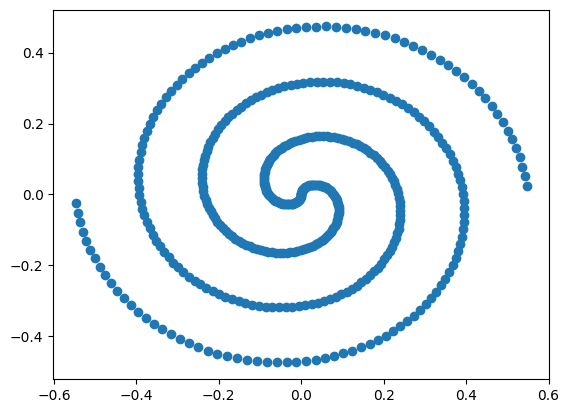

In [5]:
import matplotlib.pyplot as plt

plt.scatter(base["Feature1"], base["Feature2"])

In [6]:
red = base[base["Label"] == "Red"]
blue = base[base["Label"] == "Blue"]

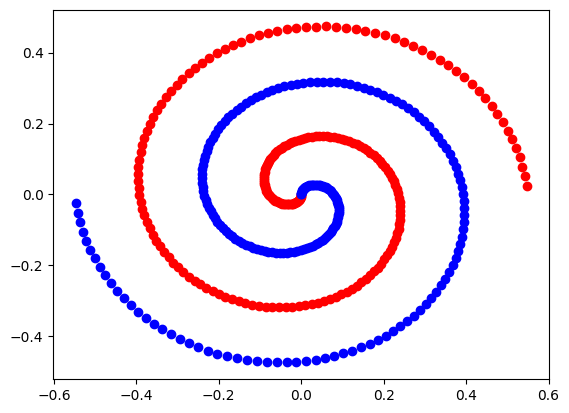

In [7]:
plt.scatter(red["Feature1"], red["Feature2"], color="r")
plt.scatter(blue["Feature1"], blue["Feature2"], color="b")

## Desenvolvimento do classificador utilizando Rede Neural Artificial :

### Converter coordenadas cartesianas para polar

Como os dados formam espirais, ao tratá-los no sistema de coordenadas polar será possível linearizar o problema

In [8]:
import numpy as np

In [9]:
x = base["Feature1"]
x2 = x ** 2
y = base["Feature2"]
y2 = y ** 2

In [10]:
radius = np.sqrt(x2 + y2)
theta = np.arctan2(x,y)

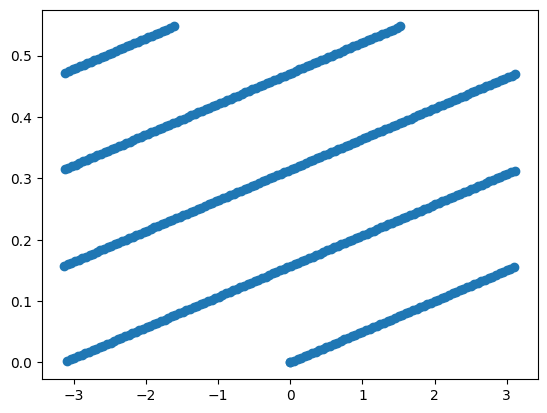

In [11]:
plt.scatter(theta, radius)

In [12]:
x_red = red["Feature1"]
y_red = red["Feature2"]
x2_red = x_red ** 2
y2_red = y_red ** 2

radius_red = np.sqrt(x2_red + y2_red)
theta_red = np.arctan2(x_red,y_red)

In [13]:
x_blue = blue["Feature1"]
y_blue = blue["Feature2"]
x2_blue = x_blue ** 2
y2_blue = y_blue ** 2

radius_blue = np.sqrt(x2_blue + y2_blue)
theta_blue = np.arctan2(x_blue,y_blue)

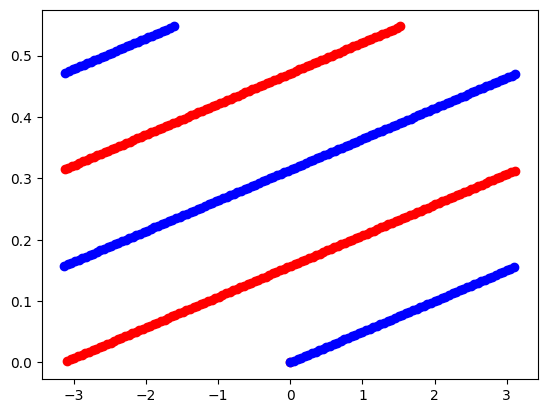

In [14]:
plt.scatter(theta_red, radius_red, color="r")
plt.scatter(theta_blue, radius_blue, color="b")

### Separando dados de treino e dados de validação

In [15]:
x = np.stack([theta, radius]).transpose()
y, label = pd.factorize(base["Label"])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((308, 2), (308,), (132, 2), (132,))

## Diagrama da rede neural e parâmetros :

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import plot_model

In [19]:
model = Sequential()
model.add(Dense(1,activation='linear'))
model.compile(optimizer='sgd',loss='mse')

ones = np.ones((1,2))
flush = model(ones)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (1, 1)                      │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9739 - val_loss: 0.6860
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5590 - val_loss: 0.4996
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4678 - val_loss: 0.4061
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3804 - val_loss: 0.3523
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3466 - val_loss: 0.3183
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3005 - val_loss: 0.2973
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2840 - val_loss: 0.2836
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2687 - val_loss: 0.2757
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2532 - val_loss: 0.2700
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2552 - val_loss: 0.2662
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2557 - val_loss: 0.2637
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

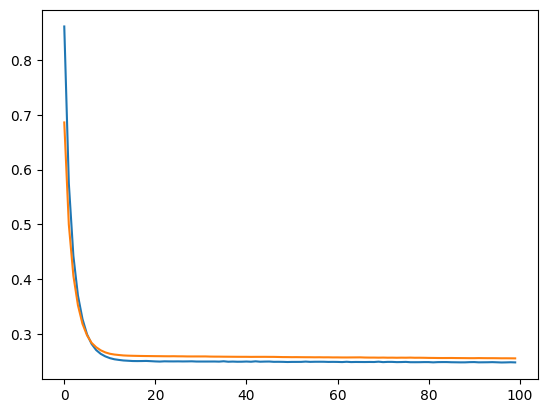

In [21]:
plt.plot(pd.DataFrame(model.history.history))

## Justificativa sobre a precisão da rede neural e pontos de atenção :

## API :